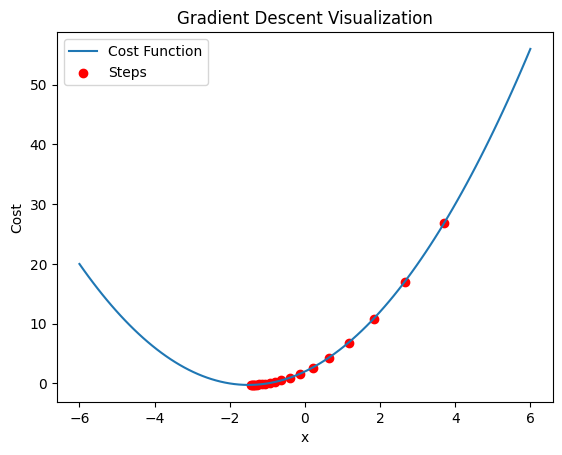

Final Output after Training: [[0.05432736]
 [0.89823995]
 [0.89824011]
 [0.13514441]]


In [1]:
# Gradient Descent Practice Notebook

import numpy as np
import matplotlib.pyplot as plt

# Function to minimize
def cost_function(x):
    return x**2 + 3*x + 2 

# Gradient of the function
def gradient(x):
    return 2*x + 3

# Gradient Descent Algorithm
def gradient_descent(learning_rate=0.1, epochs=20, start_x=5):
    x = start_x  # Initial point
    history = []
    for _ in range(epochs):
        x = x - learning_rate * gradient(x)
        history.append(x)
    return history

# Run gradient descent
history = gradient_descent()

# Plot
x_vals = np.linspace(-6, 6, 100)
y_vals = cost_function(x_vals)
plt.plot(x_vals, y_vals, label='Cost Function')
plt.scatter(history, [cost_function(x) for x in history], color='red', label='Steps')
plt.legend()
plt.xlabel('x')
plt.ylabel('Cost')
plt.title('Gradient Descent Visualization')
plt.show()

# Backpropagation Practice Notebook

# Simple Neural Network with Backpropagation
np.random.seed(42)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights
weights_input_hidden = np.random.rand(2, 2)  # 2 inputs -> 2 hidden nodes
weights_hidden_output = np.random.rand(2, 1)  # 2 hidden nodes -> 1 output

# Training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XOR Problem

learning_rate = 0.5
epochs = 10000

for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output)
    final_output = sigmoid(final_input)
    
    # Compute error
    error = y - final_output
    
    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    d_hidden = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_output)
    
    # Update weights
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden) * learning_rate

print('Final Output after Training:', final_output)
